<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

AtomVision is a deep learning package to perform various operations on image data including segmentation and classification of images. 

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
3. Plot example images from each heuristic image class

# Get the repository and install

In [1]:
import os
os.chdir('/content')
!rm -r atomvision
!ls

sample_data


In [3]:
!pip install matplotlib==3.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2022.11.6 requires pyparsing<3,>=2.2.1, but you have pyparsing 3.0.9 which is incompatible.


In [4]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('atomvision'):
  !git clone https://github.com/usnistgov/atomvision.git
  

os.chdir('atomvision')
!git checkout develop
!python setup.py develop

/content/atomvision
Already on 'develop'
Your branch is up to date with 'origin/develop'.
running develop
running egg_info
writing atomvision.egg-info/PKG-INFO
writing dependency_links to atomvision.egg-info/dependency_links.txt
writing requirements to atomvision.egg-info/requires.txt
writing top-level names to atomvision.egg-info/top_level.txt
adding license file 'LICENSE.md'
writing manifest file 'atomvision.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/atomvision.egg-link (link to .)
atomvision 2022.10.23 is already the active version in easy-install.pth
Installing train_tsne.py script to /usr/local/bin
Installing train_gan.py script to /usr/local/bin
Installing train_classifier_cnn.py script to /usr/local/bin
Installing train_autoencoder.py script to /usr/local/bin
Installing train_classifier_alignn.py script to /usr/local/bin
Installing train_segmentation.py script to /usr/local/bin

Installed /content/atomvision
Processing dependencies fo

# Example Plots for Each Image Class

The convolutional neural network classifies the structures into the 5 categories of STM images. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#List the class sub-folders generated by the neural network
test_folder = "atomvision/sample_data/test_folder/"

os.listdir(test_folder)

['1', '0', '2', '4', '3']

In [6]:
#Load the JARVIS-DFT 2D Dataset to maatch JARVIS-ID to spacegroup
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


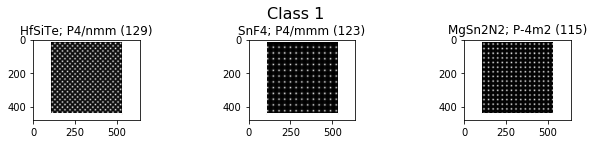

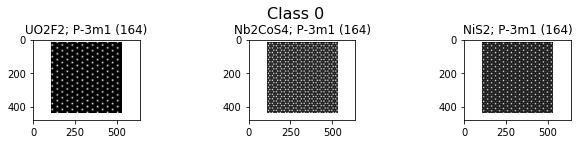

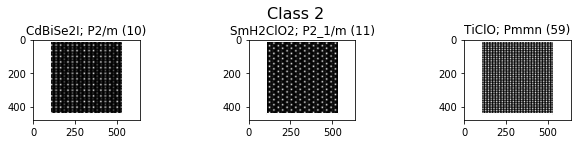

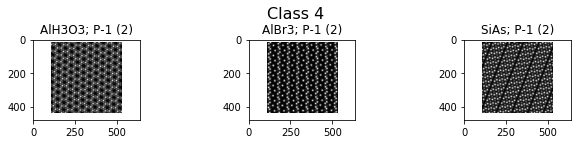

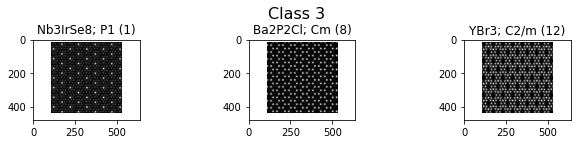

In [7]:
%matplotlib inline
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1
plt.show()

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders ``train_folder``, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes such that the train-test splits have a proportionate number of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.


The classification model chosen here is the DenseNet (reference [paper](https://paperswithcode.com/method/dense-block)), which include "dense blocks", modules in which all the layers of the neural network are directly connected to one another. 

**Try Modifying** 
1. Other classification models (such as [ResNet](https://paperswithcode.com/method/resnet) or [VGG](https://paperswithcode.com/method/vgg)) can be trialled as well by substitute (using ``model_name`` tag)
2. Number of training epochs (using ``epochs`` tag)
3. Batch size (using ``batch_size`` tag)
4. Loss function (using ``criterion`` tag)

In [8]:
pip uninstall -y pathlib

In [9]:
!train_classifier_cnn.py --model densenet --train_folder atomvision/sample_data/test_folder --test_folder atomvision/sample_data/test_folder --epochs 5 --batch_size 16

/usr/local/lib/python3.7/dist-packages/torchvision-0.13.0-py3.7-linux-x86_64.egg/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision-0.13.0-py3.7-linux-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100% 110M/110M [00:01<00:00, 79.3MB/s]
Training-Epoch:1  Avg acc: 41.85 Avg loss: 

In [10]:
#Show any output files that have been generated
!ls

Acc.png			    atomvision.egg-info  LICENSE.md
atomvision		    cm.json		 Loss.png
atomvision_checkpoint_4.pt  CM.png		 README.md
atomvision_checkpoint_5.pt  CODEMETA.yaml	 setup.py


## Show Performance Metrics Using Test Set

Metrics used to train the classifier include the _accuracy_, _loss_, and _confusion matrix_. Each of which is discussed and plotted out below.

**Accuracy versus Training Epochs**

The classification accuracy is calculated from the relative number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN). It equals the number of correct predictions divided by the total number of predictions.

$\mathrm{Accuracy} = \frac{(TP + TN)}{(TP + FN + FP + TN)}$

([], <a list of 0 Text yticklabel objects>)

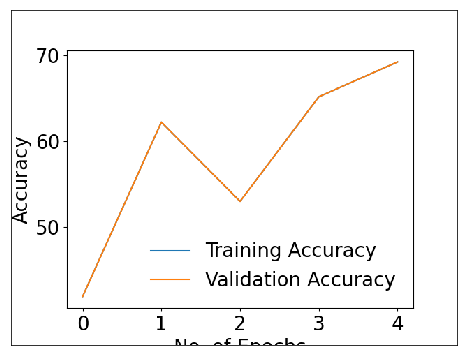

In [13]:
import matplotlib.image as mpimg
plt.figure(figsize = (8,8))
img = mpimg.imread('Acc.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])

**Loss versus Training Epochs**

The default loss function is the negative log likelihood, which should be minimzed in order to have the highest probabilities associated with correctly labelled samples.

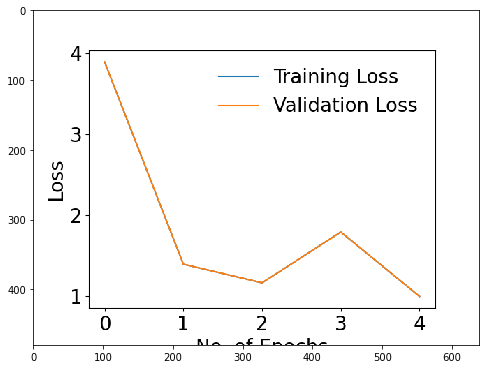

In [14]:
plt.figure(figsize = (8,8))
img = mpimg.imread('Loss.png')
imgplot = plt.imshow(img)

**Confusion Matrix**

The confusion matrix provides a visual representation of the performance of the classification model. The ``true`` labels are shown along the vertical axis, while the ``predicted`` labels are given along the horizontal axis. Any sample that lies along the diagonal is correctly classified, while off-diagonal samples are incorrectly classified. 

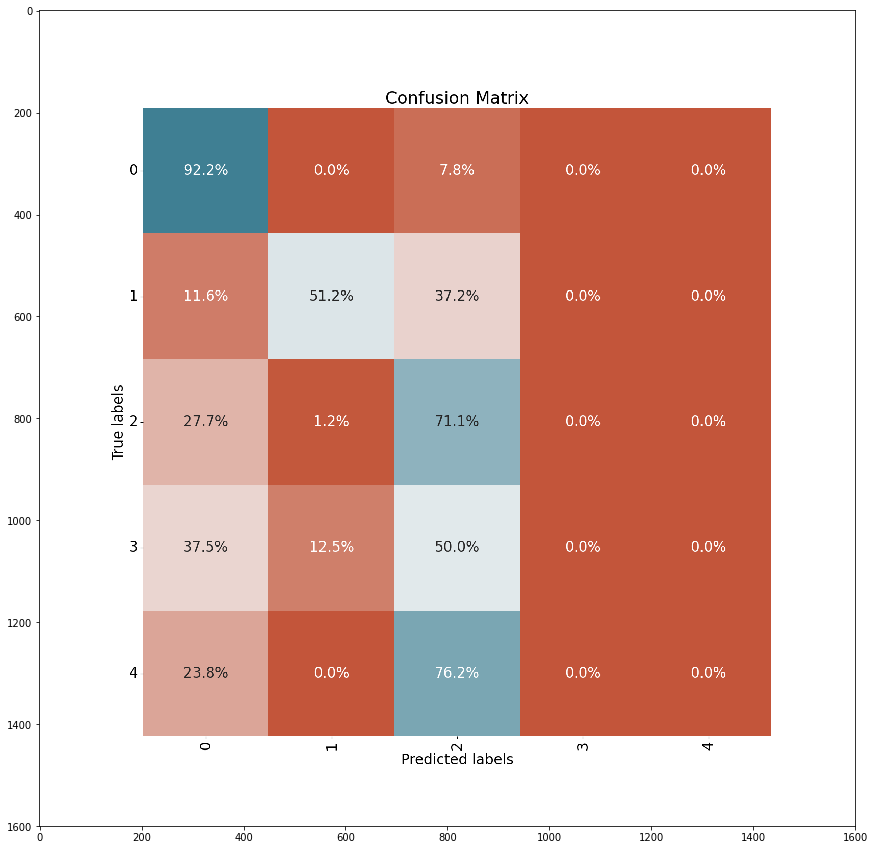

In [15]:
plt.figure(figsize = (15,15))
img = mpimg.imread('CM.png')
imgplot = plt.imshow(img)